In [ ]:
!pip install ultralytics opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.6/914.6 kB 28.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Verify the Dataset Location

import os

dataset_path = "/content/drive/MyDrive/AIproject/dataset/"

if os.path.exists(dataset_path):
    print("✅ Dataset folder found!")
    print("Contents:", os.listdir(dataset_path))
else:
    print("❌ Dataset folder not found. Check the path in Google Drive.")


✅ Dataset folder found!
Contents: ['train', 'val', 'test', 'data.yaml']


In [ ]:
#Check Inside the Folders

train_path = os.path.join(dataset_path, "train")
val_path = os.path.join(dataset_path, "val")
test_path = os.path.join(dataset_path, "test")

print("Train contents:", os.listdir(train_path))
print("Val contents:", os.listdir(val_path))
print("Test contents:", os.listdir(test_path))


Train contents: ['labels', 'images', 'labels.cache']
Val contents: ['images', 'labels', 'labels.cache']
Test contents: ['labels', 'images']


In [ ]:
#Verify data.yaml Paths

yaml_path = os.path.join(dataset_path, "data.yaml")

with open(yaml_path, "r") as f:
    print(f.read())


train: /content/drive/MyDrive/AIproject/dataset/train/images
val: /content/drive/MyDrive/AIproject/dataset/val/images
test: /content/drive/MyDrive/AIproject/dataset/test/images

nc: 1  # Number of classes
names: ["licence"]  # Class names



In [ ]:
# Training the model

!yolo task=detect mode=train model=yolov8n.pt data=/content/drive/MyDrive/AIproject/dataset/data.yaml epochs=50 imgsz=640 device=0


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.25M/6.25M [00:00<00:00, 150MB/s]
Ultralytics 8.3.73 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/AIproject/dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, sav

In [ ]:
# saving the model
# Load the trained model
import torch
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# # Save the entire model (architecture + weights)
torch.save(model, "PlateDetector_model.pth")

# print("Model saved successfully!")


In [ ]:
# Testing the Model
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # Use the best weights

# Run inference on test images
results = model.predict(source="/content/drive/MyDrive/AIproject/dataset/test/images", save=True)

print("Testing complete! Check the saved results.")



image 1/65 /content/drive/MyDrive/AIproject/dataset/test/images/Cars0.png: 352x640 1 licence, 44.2ms
image 2/65 /content/drive/MyDrive/AIproject/dataset/test/images/Cars102.png: 512x640 1 licence, 33.8ms
image 3/65 /content/drive/MyDrive/AIproject/dataset/test/images/Cars106.png: 416x640 3 licences, 34.4ms
image 4/65 /content/drive/MyDrive/AIproject/dataset/test/images/Cars113.png: 480x640 1 licence, 35.9ms
image 5/65 /content/drive/MyDrive/AIproject/dataset/test/images/Cars12.png: 256x640 1 licence, 46.5ms
image 6/65 /content/drive/MyDrive/AIproject/dataset/test/images/Cars120.png: 448x640 1 licence, 51.0ms
image 7/65 /content/drive/MyDrive/AIproject/dataset/test/images/Cars126.png: 480x640 1 licence, 9.2ms
image 8/65 /content/drive/MyDrive/AIproject/dataset/test/images/Cars128.png: 384x640 1 licence, 59.1ms
image 9/65 /content/drive/MyDrive/AIproject/dataset/test/images/Cars136.png: 448x640 1 licence, 7.6ms
image 10/65 /content/drive/MyDrive/AIproject/dataset/test/images/Cars14.png:

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/drive/MyDrive/AIproject/CarTest.jpg: 288x640 1 licence, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 640)
Results saved to runs/detect/predict2


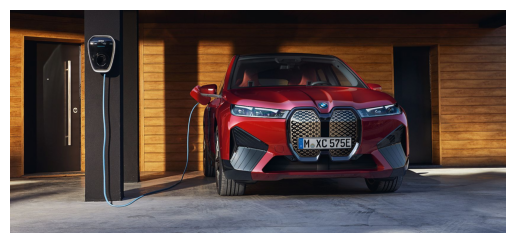

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # Update the path

# Provide the path to an external image
image_path = "/content/drive/MyDrive/AIproject/CarTest.jpg"  # Replace with your image path

# Run inference
results = model(image_path)  # Remove `save=True, show=True` (Not needed for visualization here)

# Load the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw bounding boxes
for result in results:
    for box in result.boxes.xyxy:  # Extract bounding boxes (x1, y1, x2, y2)
        x1, y1, x2, y2 = map(int, box[:4])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)  # Draw bounding box

# Display the image with detections
plt.imshow(img)
plt.axis("off")
plt.show()



In [ ]:
# Extracting the numbers of the Car plate using OCR(Optical Character Recognition)


In [ ]:
!apt install tesseract-ocr -y
!pip install pytesseract opencv-python matplotlib ultralytics


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,770 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
import cv2
import torch
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
from ultralytics import YOLO


In [ ]:
# Load the Model

model = YOLO("/content/runs/detect/train/weights/best.pt")


In [ ]:
# Run Detection & Crop the License Plate

def detect_and_crop(image_path):
    # Read the input image
    img = cv2.imread(image_path)

    # Run YOLO inference
    results = model(image_path)

    # Extract bounding box of detected license plate
    for r in results:
        for box in r.boxes.xyxy:  # Get x_min, y_min, x_max, y_max
            x_min, y_min, x_max, y_max = map(int, box)

            # Crop the detected license plate
            cropped_plate = img[y_min:y_max, x_min:x_max]

            # Show the cropped plate (optional)
            plt.imshow(cv2.cvtColor(cropped_plate, cv2.COLOR_BGR2RGB))
            plt.axis("off")
            plt.show()

            return cropped_plate  # Return the cropped image

    return None  # If no plate is detected


In [ ]:
#Apply OCR on the cropped license image to Extract Text

def apply_ocr(cropped_img):
    if cropped_img is None:
        return "No license plate detected"

    # Convert to grayscale for better OCR accuracy
    gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

    # Use Tesseract OCR to extract text
    plate_text = pytesseract.image_to_string(gray, config="--psm 7")  # Mode 7 = single text line
    return plate_text.strip()  # Remove extra spaces/newlines



image 1/1 /content/runs/detect/predict/Cars12.jpg: 256x640 2 licences, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 640)


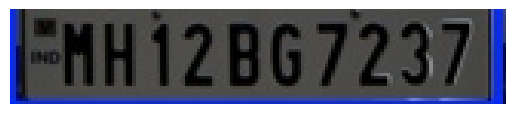

Detected License Plate: MH12BG67237)|


In [ ]:
# Test with an Image

image_path = "/content/runs/detect/predict/Cars12.jpg"  # Replace with your test image path
cropped_plate = detect_and_crop(image_path)  # Detect & crop
plate_text = apply_ocr(cropped_plate)  # Run OCR

print("Detected License Plate:", plate_text)
